# Argentina programa 4.0 - Módulo 2: Ciencia de Datos

---
## Ejercícios Semana 7. Validación Cruzada


## Regresión polinomial con validación cruzada

En este ejercicio vamos a trabajar con una versión recortada de un nuevo dataset muy sencillo, "mtcars". El mismo contiene datos de 32 modelos de autos y fue extraído de una revista estadounidense de automovilismo de 1974. Esta versión, que pueden descargar de [acá](https://drive.google.com/file/d/1X3AUlr11cQc3U05Tv7NxI8kRYYxPMlPI/view?usp=sharing), contiene sólo tres columnas:



*   `mpg`: *Miles per gallon* (consumo de combustible expresado en millas por galón de gasolina)
*   `hp`: *horsepower* (caballos de fuerza)
*   `disp`: *displacement* (desplazamiento, el volumen de aire desplazado por los cilindros del motor, en pulgadas cúbicas)



La idea va a ser hacer una regresión polinomial con algún tipo de regularización (pueden elegir entre usar Ridge o Lasso) y tratar de predecir los valores del consumo de gasolina (`mpg`) en términos de las otras dos. Para ello:

**a)** Exploren brevemente los datos, y separenlos en los conjuntos de entrenamiento y testeo.

**b)** Armen un pipeline como el que hicimos en clase (que lleva un escalador, el creador de features polinomiales y el modelo que hayan elegido).

**c)** Usen GridSearchCV para determinar los hiperparámetros óptimos del modelo usando el (valor negativo del) error cuadrático medio como métrica del puntaje (*score*). (Nota: como son pocos datos, pueden hacer una exploración más exhaustiva de los parámetros respecto de lo que hicimos en clase).

**d)** Grafiquen en colores el score del modelo en función de los dos hiperparámetros. ¿Cuál es la mejor combinación? (Recuerden que eso lo puede obtener pidiendo el atributo `.best_params_` del `GridSearchCV`) ¿Cuál es el mejor error cuadrático medio (MSE)?

**e)** Evalúen la performance del mejor modelo en el conjunto de testeo.



In [ ]:
import os
import pandas as pd

## Conectar Drive a Colab
from google.colab import drive
drive.mount('/content/drive')

# cambio al directorio donde están los datos
#os.chdir('/content/drive/MyDrive/Colab Notebooks/Data/')
os.chdir('/content/drive/MyDrive/argentinaprograma/Archivos_Datos/')

# Cargar el archivo CSV en un DataFrame
df_cars = pd.read_csv('mtcars_cut.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,disp,hp,mpg
0,160.0,110,21.0
1,160.0,110,21.0
2,108.0,93,22.8
3,258.0,110,21.4
4,360.0,175,18.7


In [ ]:
# a) Veamos un poco el dataset
print(df_cars.head())

# Elegimos las siguientes columnas (numéricas) para usar
columnas = ['disp', 'hp']
target = ['mpg']

    disp   hp   mpg
0  160.0  110  21.0
1  160.0  110  21.0
2  108.0   93  22.8
3  258.0  110  21.4
4  360.0  175  18.7


array([[<Axes: xlabel='disp', ylabel='disp'>,
        <Axes: xlabel='hp', ylabel='disp'>,
        <Axes: xlabel='mpg', ylabel='disp'>],
       [<Axes: xlabel='disp', ylabel='hp'>,
        <Axes: xlabel='hp', ylabel='hp'>,
        <Axes: xlabel='mpg', ylabel='hp'>],
       [<Axes: xlabel='disp', ylabel='mpg'>,
        <Axes: xlabel='hp', ylabel='mpg'>,
        <Axes: xlabel='mpg', ylabel='mpg'>]], dtype=object)

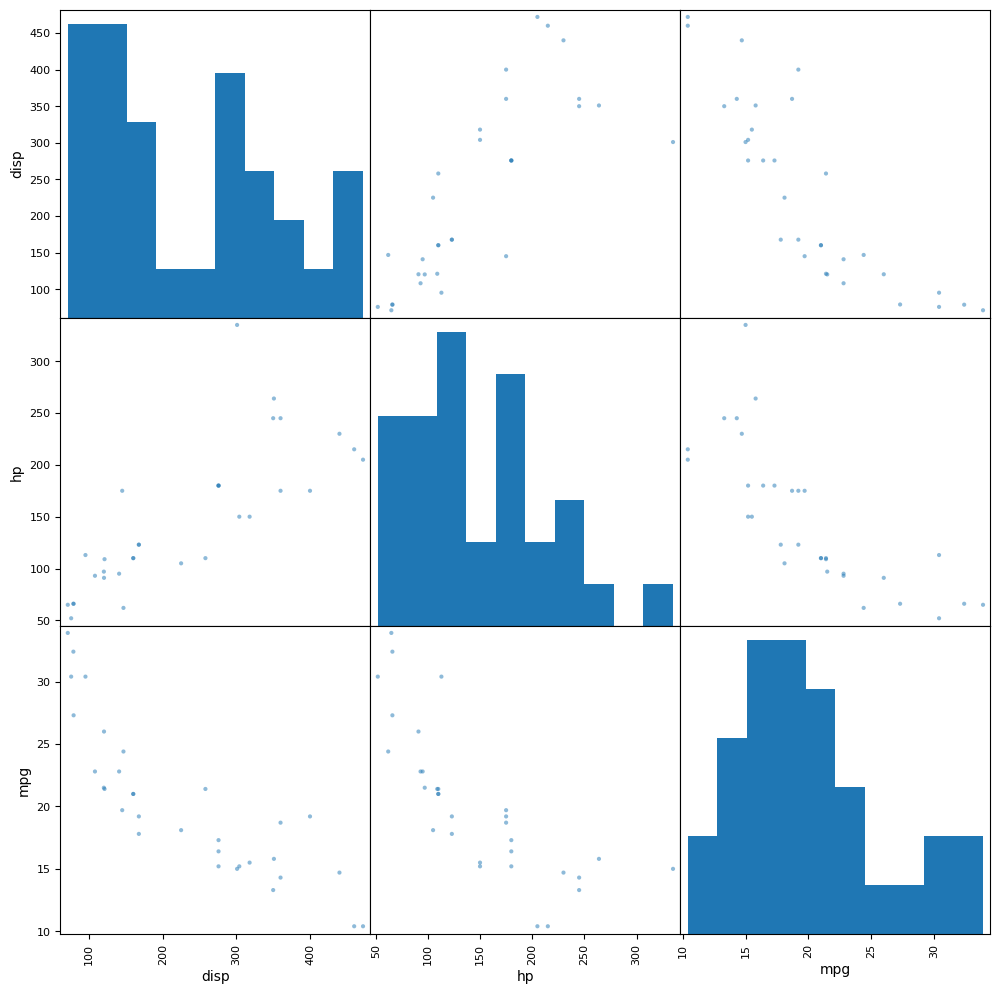

In [ ]:
# Miramos n poco los datos
pd.plotting.scatter_matrix(df_cars, figsize=(12, 12), alpha=0.5)


In [ ]:
# Separamos Train y Test
from sklearn.model_selection import train_test_split

x_train, x_test, t_train, t_test = train_test_split(df_cars[columnas], df_cars[target], random_state=42)

In [ ]:
# b) Usamos Ridge, como en clase
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.linear_model import Ridge

"""Construye un pipeline para la regresión contraída (ridge regression)
usamos un StandardScaler

Atención: la función ridge toma como argumento alpha = lambda/2"""

modelo = Pipeline([('scaler', StandardScaler()),
                   ('poly_features', PolynomialFeatures()),
                   ('regressor', Ridge())])

In [ ]:
# c)
import numpy as np
from sklearn.model_selection import GridSearchCV

# Definimos los parámetros para cada parte del pipeline. Separamos parámetro de nombre con  ‘__’:
parameters = {'poly_features__degree' : range(1, 8),
              'regressor__alpha': np.logspace(-4, 4, 30)}

# Armamos el GridSearchCV
grid_search = GridSearchCV(modelo, parameters, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# y entrenamos
grid_search.fit(x_train, t_train)

GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('poly_features', PolynomialFeatures()),
                                       ('regressor', Ridge())]),
             n_jobs=-1,
             param_grid={'poly_features__degree': range(1, 8),
                         'regressor__alpha': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-....03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04])},
             scoring='neg_mean_squared_error')

In [ ]:
# d) Los mejores parámetros son:
print('Mejores parámetros', grid_search.best_params_)
print('Mejor MSE', -grid_search.best_score_)

Mejores parámetros {'poly_features__degree': 3, 'regressor__alpha': 0.7278953843983146}
Mejor MSE 8.293741758854452


In [ ]:
# Para hacer el gráfico, uso los cv_results_
cv_results = grid_search.cv_results_

# Armo el dataframe
results_df = pd.DataFrame(cv_results)

# Selecciono solo las columnas que me interesan
columnas = ['param_poly_features__degree', 'param_regressor__alpha',
            'mean_test_score', 'std_test_score']
results_df = results_df[columnas]

Text(0, 0.5, 'Regularizador ($\\lambda$)')

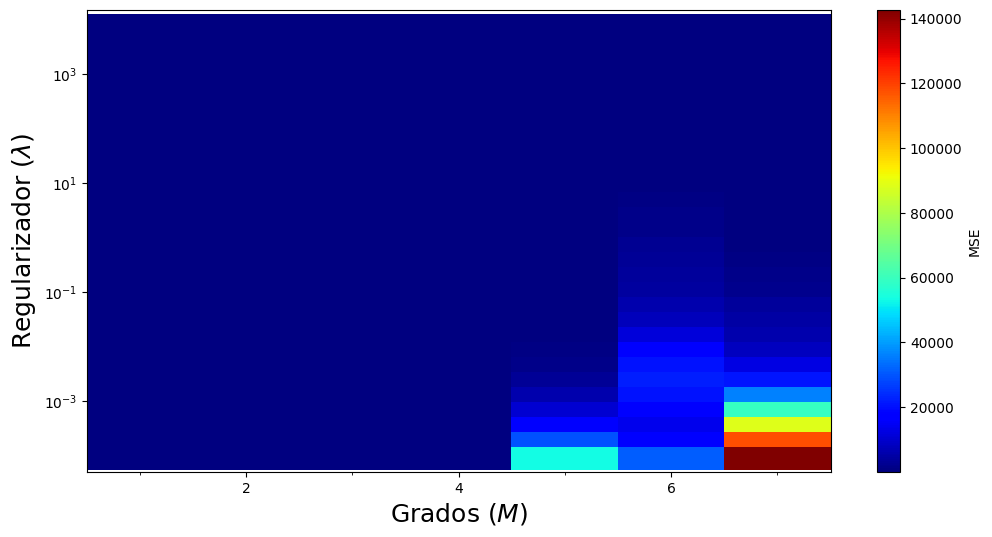

In [ ]:
import matplotlib.pyplot as plt

# Valores de los ejes
grados = np.array(results_df['param_poly_features__degree'].unique())
lambdas = np.array(results_df['param_regressor__alpha'].unique())
Yp, Xp = np.meshgrid(lambdas,grados)
Zp = -np.array(results_df['mean_test_score']).reshape(len(grados),len(lambdas))

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
# Grafico
pcol = plt.pcolor(Xp, Yp, Zp, cmap='jet')

# Usamos escala logarítmica para lambda
ax.set_yscale('log')
ax.set_ylim(0.00005,15000)

# Define las marcas del eje x en números enteros
ax.xaxis.set_major_locator(plt.MultipleLocator(2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(1))

# Barra de colores y rótulos
plt.colorbar(pcol, label='MSE')
ax.set_xlabel('Grados ($M$)', fontsize=18)
ax.set_ylabel('Regularizador ($\lambda$)', fontsize=18)

Text(0, 0.5, 'Regularizador ($\\lambda$)')

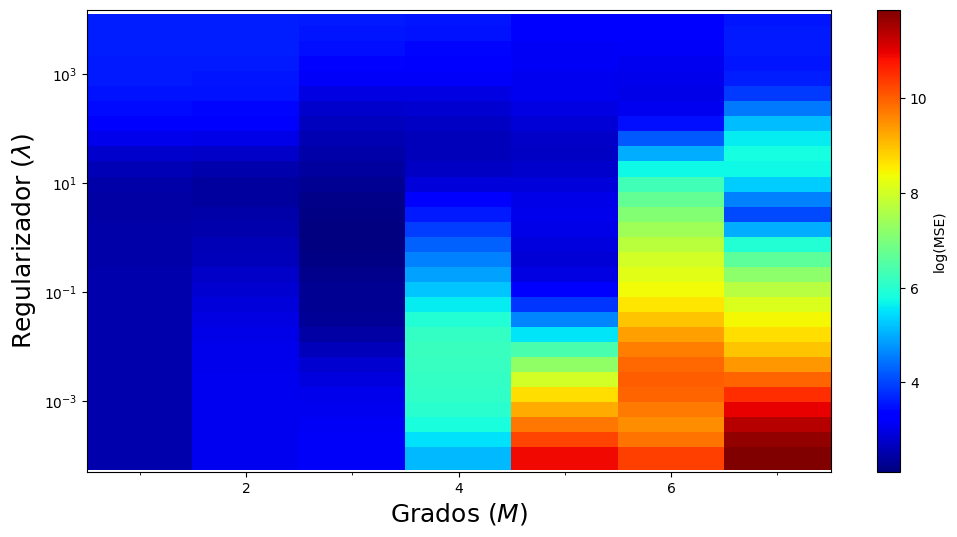

In [ ]:
# Como los valores son muy similares por el centro, tomo el logaritmo del MSE

# Tomo logaritmo del MSE
Zp = np.log(-np.array(results_df['mean_test_score']).reshape(len(grados),len(lambdas)))

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
# Grafico
pcol = plt.pcolor(Xp, Yp, Zp, cmap='jet')

# Usamos escala logarítmica para lambda
ax.set_yscale('log')
ax.set_ylim(0.00005,15000)

# Define las marcas del eje x en números enteros
ax.xaxis.set_major_locator(plt.MultipleLocator(2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(1))

# Barra de colores y rótulos
plt.colorbar(pcol, label='log(MSE)')
ax.set_xlabel('Grados ($M$)', fontsize=18)
ax.set_ylabel('Regularizador ($\lambda$)', fontsize=18)

In [ ]:
np.log(20)

2.995732273553991

In [ ]:
# e) evaluamos en testeo
from sklearn.metrics import mean_squared_error

# Tomo el mejor modelo de la validación cruzada
mejor_modelo = grid_search.best_estimator_

# Evalúo y calculo el error
y_test = mejor_modelo.predict(x_test)
mse_test = mean_squared_error(t_test, y_test)
mse_test

20.448242693825016